Notebook Test

In [ ]:
%pip install --upgrade matplotlib

In [1]:
# All imports here
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import joblib

# Importing excel sheets as dfs, should both have samples in the same order
predictors_df = pd.read_excel('Predictors_Cleaned.xlsx', 0)
    # Rows are samples, columns are predictors
outcomes_df = pd.read_excel('Outcomes_Cleaned.xlsx', 0)
    # Rows are samples, columns are mechanisms

# print(predictors_df) # 211 x 33
# print(outcomes_df) # 211 x 41


In [5]:
# DO NOT RUN ON MY PC IT WILL MAYBE EXPLODE

X = predictors_df.drop('SAMPLE NAME', axis=1)
Y = outcomes_df.drop('MECHANISM', axis=1) # Full DF must iterate through
feature_names = X.columns

# List of columns
columns = list(Y)

'''
for i in columns:
    r2 = 0 # resetting the r2 value for each column
    # split data for each class
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y[i], test_size=0.6)

    for j in range(10): # Training 10 models to compare
        # train model
        rf = RandomForestRegressor(n_estimators=500, max_depth= 4, random_state=0, oob_score=True)
        rf = rf.fit(X_train, Y_train)

        # evaluate model
        predictions = rf.predict(X_test)
        new_r2 = abs(r2_score(Y_test, predictions)) # using absolute value for comparision

        # Compare model
        if new_r2 > r2:
            r2 = new_r2
            # Saving the better model
            joblib.dump(rf, f"my_random_forest{i}.joblib")
    # Printing highest r2 value
    print(f"{i} r2: {r2}")

'''

'\nfor i in columns:\n    r2 = 0 # resetting the r2 value for each column\n    # split data for each class\n    X_train, X_test, Y_train, Y_test = train_test_split(X, Y[i], test_size=0.6)\n\n    for j in range(10): # Training 10 models to compare\n        # train model\n        rf = RandomForestRegressor(n_estimators=500, max_depth= 4, random_state=0, oob_score=True)\n        rf = rf.fit(X_train, Y_train)\n\n        # evaluate model\n        predictions = rf.predict(X_test)\n        new_r2 = abs(r2_score(Y_test, predictions)) # using absolute value for comparision\n\n        # Compare model\n        if new_r2 > r2:\n            r2 = new_r2\n            # Saving the better model\n            joblib.dump(rf, f"my_random_forest{i}.joblib")\n    # Printing highest r2 value\n    print(f"{i} r2: {r2}")\n\n'

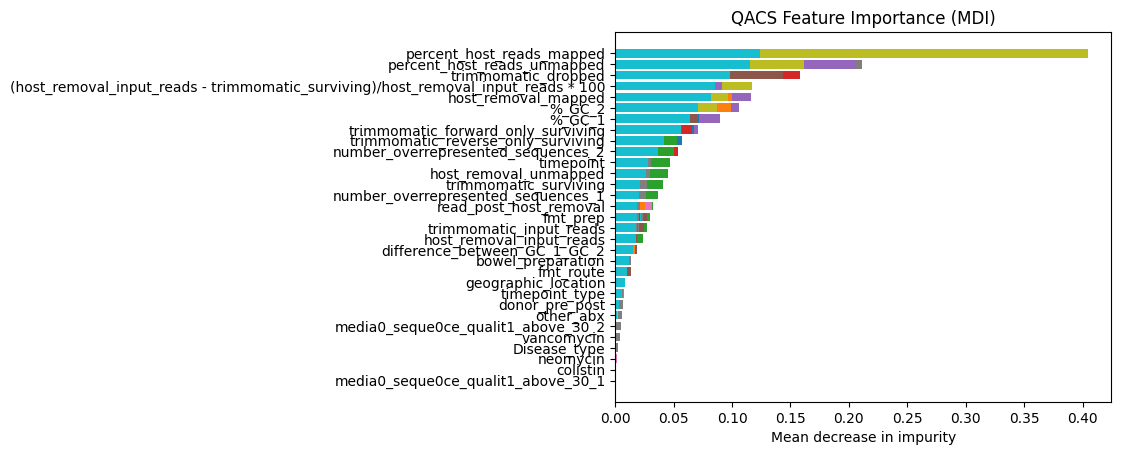

In [8]:
# Visualizing Random Forest

for k in columns:
    # Loading saved models
    loaded_rf = joblib.load(f"my_random_forest{k}.joblib")
    
    # obtain feature importance
    feature_importance = loaded_rf.feature_importances_

    # sort features according to importance
    sorted_features = np.argsort(feature_importance)
    pos = np.arange(sorted_features.shape[0])

    # plot feature importances
    plt.barh(pos, feature_importance[sorted_features], align="center")

    plt.yticks(pos, np.array(feature_names)[sorted_features])
    plt.title(f"{k} Feature Importance (MDI)")
    plt.xlabel("Mean decrease in impurity");
    
    plt.savefig(f'{k}_features.png')

In [ ]:
'''
# TEST for single model

# Removing the first column (sample IDs) and converting to numpy array
X = predictors_df.drop('SAMPLE NAME', axis=1)
Y = outcomes_df['Lipopeptides']

# Split the data into training and test sets with an 80/20 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Creating the Random Forest model
rf = RandomForestRegressor(n_estimators=1000, random_state=0, oob_score=True)
rf = rf.fit(X_train, Y_train)

# Out of Bag Score
oob_score = rf.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = rf.predict(X)
# Finding MSE
mse = mean_squared_error(Y, predictions)
print(f'Mean Squared Error: {mse}')
# Finding r2
r2 = r2_score(Y, predictions)
print(f'R-squared: {r2}')

# Saving the model 
import joblib

joblib.dump(rf, "my_random_forest.joblib")
'''

Need to consider how im changing max_features